In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/Users/bianca/Documents/GitHub/DAT-10-14/class material/Unit2/data/housing.csv")

In [4]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.iloc[:,:-1]
y = df['PRICE']

In [10]:
#test size means what percent of data set do you want to be considered 'test'; in this case 20%

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2019)

In [11]:
del y_test

In [14]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [15]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lreg.predict(X_test)

array([20.33192034, 30.56150855, 11.42198946, 16.8970806 , 27.01912782,
       12.77729555, 25.41460999, 23.95267008, 33.79154132, 33.50126749,
       25.05429557, 31.66430227, 19.98285258, 12.4616218 , -6.66297423,
       23.36867493, 14.92932538, 44.05472038, 22.81669548,  3.72098139,
       31.25746504, 20.68406647, 22.9425323 , 19.37448096, 12.91699241,
       32.99373116, 21.81521649, 24.14498433, 18.41220509, 31.15685856,
       16.76006243, 22.72843014, 19.40334092, 28.75501841, 17.70196598,
       17.23717678, 18.22754471, 13.96560217, 28.73279778, 20.19961892,
       36.2948616 , 17.91369056, 21.34274873, 20.02922409, 31.41285753,
       32.01264434, 22.77358347, 35.02549046, 16.89214363,  3.59801458,
       21.16194967, 23.74010706, 16.04165109, 28.36558986, 25.12232923,
       23.44071444, 19.97735813, 33.37129595, 14.00816978, 19.54187977,
       22.52890094, 25.30659334, 12.14810149, 16.59211993, 13.73365327,
       30.68379456, 31.574453  , 28.95691257,  8.72573318, 28.99

In [18]:
X_val, y_val = X_train[-100:].copy(), y_train[-100:].copy()

In [20]:
X_val.shape

(100, 13)

In [22]:
y_val.head()

421    14.2
488    15.2
349    26.6
108    19.8
130    19.2
Name: PRICE, dtype: float64

In [23]:
X_train, y_train = X_train[:-100].copy(), y_train[:-100].copy()

In [24]:
X_train.shape

(304, 13)

In [25]:
lreg.score(X_val, y_val)

0.706012324709548

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2019)

In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = lreg,X=X_train, y=y_train, cv=10)

In [29]:
scores

array([0.74469313, 0.72965599, 0.78482663, 0.65675571, 0.66315517,
       0.78283033, 0.81788242, 0.79596427, 0.5480151 , 0.75188945])

In [30]:
from sklearn.model_selection import KFold

kfold = KFold()

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [31]:
np.mean(scores)

0.7275668192780946

In [32]:
np.std(scores)

0.07839580317172443

In [34]:
import seaborn as sns

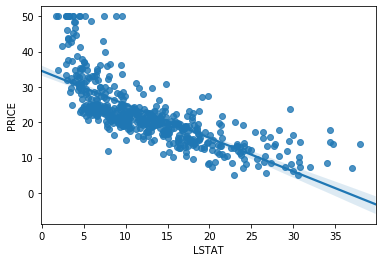

In [36]:
sns.regplot(x='LSTAT', y = 'PRICE', data =df);

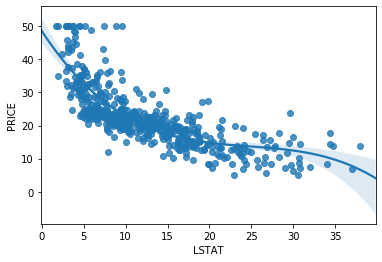

In [46]:
#notice the parabolic shape of the above scatter plot

sns.regplot(x='LSTAT', y = 'PRICE', data =df, order=3);

In [ ]:
#adding a polynomial power
#but the higher order the term, the more brittle they tend to become - memorizing data vs. learning from it

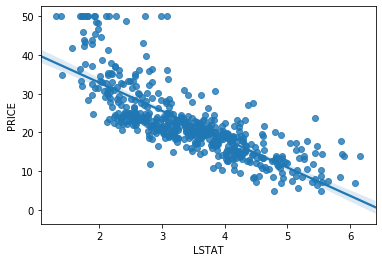

In [48]:
sns.regplot(np.sqrt(df['LSTAT']), df['PRICE']);

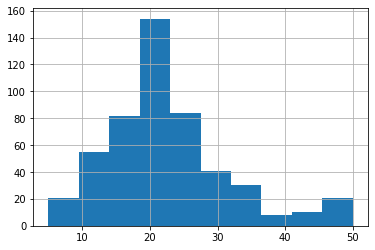

In [52]:
df['PRICE'].hist();

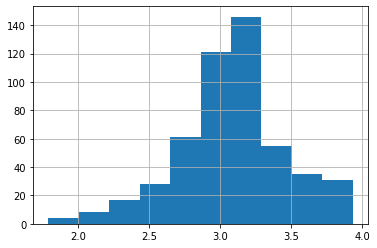

In [53]:
np.log1p(y).hist();

In [54]:
#taking the target variable's log makes it more manageable 

In [139]:
df=df.drop(['PRICE_2', 'LSTAT_2', 'NOX_LSTAT'],axis=1)

In [140]:
df['PRICE_2'] = np.log1p(df['PRICE'])

In [141]:
X_2 = df.iloc[:,:-2]
y_2 = df['PRICE_2']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_2,y_2, test_size=0.2, random_state=2019)

In [143]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
scores = cross_val_score(estimator = lreg,X=X_train, y=y_train, cv=10)

In [145]:
scores

array([0.81066965, 0.78080019, 0.78969268, 0.72301188, 0.72305225,
       0.81510248, 0.84755808, 0.81720277, 0.69862075, 0.79529768])

In [146]:
np.mean(scores)

0.7801008400068822

In [147]:
df['LSTAT_2']=df['LSTAT']**2

In [148]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PRICE_2,LSTAT_2
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,3.218876,24.8004
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3.117950,83.5396
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,3.575151,16.2409
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,3.538057,8.6436
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,3.616309,28.4089


In [149]:
X_3 = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT_2']]
y_3 = df['PRICE_2']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_3,y_3, test_size=0.2, random_state=2019)

In [151]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
scores = cross_val_score(estimator = lreg,X=X_train, y=y_train, cv=10)

In [153]:
scores

array([0.74776295, 0.81269198, 0.79374258, 0.68792469, 0.67177768,
       0.77093024, 0.80173639, 0.80700093, 0.60275154, 0.75515722])

In [154]:
np.mean(scores)

0.7451476195957716

In [ ]:
#changing LSTAT - squaring the value of LSTAT increases value of returns
#create new variables that capture information that wouldn't be encoded in 

In [155]:
X_4 = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT_2']]
y_4 = df['PRICE']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_3,y_3, test_size=0.2, random_state=2019)

In [157]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
scores = cross_val_score(estimator = lreg,X=X_train, y=y_train, cv=10)

In [159]:
np.mean(scores)

0.7451476195957716

In [ ]:
#moving on the Model PREP!

In [160]:
titanic = pd.read_csv("/Users/bianca/Documents/GitHub/DAT-10-14/class material/Unit2/data/titanic.csv")

In [161]:
titanic.isnull().sum()
#see how certain columns have missing values!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#dealing with categorical columns is more time intensive

In [162]:
#Non Random Missing Data

In [163]:
#columns where values have similaries (if missing values across columns in same rows)

In [164]:
titanic['Age'].isnull().sum()

177

In [171]:
titanic['Age'].mean()

29.69911764705882

In [ ]:
#if we wanted to inject the mean in the empty values

In [ ]:
#simplest way is to add in the mean or mode
#titanic['Age'].mean().fillna(titanic['Age'].mean())

In [166]:
#take average value of training set

In [167]:
#remember that Titanic's seemingly most important variables were Pclass and Sex

In [168]:
#group by method!

In [170]:
titanic.groupby(['Sex', 'Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [172]:
#use transform method

In [176]:
age_group = titanic.groupby(['Sex', 'Pclass'])['Age'].transform('mean')

In [177]:
# you would run the below to fill the NAs
titanic['Age'] = titanic['Age'].fillna(age_group)

In [179]:
titanic = pd.read_csv("/Users/bianca/Documents/GitHub/DAT-10-14/class material/Unit2/data/titanic.csv")

In [180]:
#you can also run a regression to predict missing values

In [181]:
#predict missing values based on current set

In [182]:
#categorical encoding

In [183]:
#Ordinal Encoding

In [184]:
#if natural ranking to variables, transform to numeric rank. For example, Small, Medium and Large would be 1,2,3 respectively

In [185]:
#most of the time, you don't have natural ranking

In [186]:
#for those you have onehot encoding

In [187]:
#bimodal representation of variables, using method get_dummies

In [188]:
titanic['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [190]:
pd.get_dummies(titanic['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [191]:
#the above is called dummy encoding or one-hot encoding; basic idea says that row 1 is S, row 2 is C, etc

In [192]:
#number of columns you have tends to increase greatly

In [193]:
#but if you have a LOT of unique columns (e.g. zipcodes), then will create new columns for all and will greatly expand your columns

In [194]:
#will make linear modelling a bit difficult

In [195]:
#if you have a column with a high number of unique columns, find ways to reduce things to lower dimensions or 

In [196]:
#TARGET ENCODING!

In [204]:
titanic['Name'].str.split().str[1]

0             Mr.
1            Mrs.
2           Miss.
3            Mrs.
4             Mr.
5             Mr.
6             Mr.
7         Master.
8            Mrs.
9            Mrs.
10          Miss.
11          Miss.
12            Mr.
13            Mr.
14          Miss.
15           Mrs.
16        Master.
17            Mr.
18        Planke,
19           Mrs.
20            Mr.
21            Mr.
22          Miss.
23            Mr.
24          Miss.
25           Mrs.
26            Mr.
27            Mr.
28          Miss.
29            Mr.
          ...    
861           Mr.
862          Mrs.
863         Miss.
864           Mr.
865          Mrs.
866             y
867           Mr.
868    Melkebeke,
869       Master.
870           Mr.
871          Mrs.
872           Mr.
873     Cruyssen,
874          Mrs.
875         Miss.
876           Mr.
877           Mr.
878           Mr.
879          Mrs.
880          Mrs.
881           Mr.
882         Miss.
883           Mr.
884           Mr.
885       

In [205]:
#now you have a more manage-able number of columns

In [206]:
titanic['Name'].str.split().str[1].value_counts()

Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Col.              2
Gordon,           2
Mlle.             2
Major.            2
Messemaeker,      1
Capt.             1
Melkebeke,        1
Don.              1
der               1
the               1
Billiard,         1
Steen,            1
Jonkheer.         1
Shawah,           1
Ms.               1
Cruyssen,         1
Carlo,            1
Walle,            1
Mme.              1
Velde,            1
Mulder,           1
Pelsmaeker,       1
Name: Name, dtype: int64

In [208]:
train = pd.read_csv("/Users/bianca/Documents/GitHub/DAT-10-14/class material/Unit3/data/movies/train.csv")

In [209]:
train.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue,genre
0,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,1960-01-01,17,4.9,1960,0.0,0.0,Action
1,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,1960-01-01,19,6.6,1960,0.0,0.0,Horror
2,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,1960-02-11,12,4.9,1960,0.0,0.0,Action
3,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,1960-02-22,10,6.0,1960,0.0,0.0,Comedy
4,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,1960-03-01,12,6.5,1960,0.0,0.0,Action


In [211]:
train['director'].nunique()

4035

In [212]:
#in the below, how many times does the director appear in the dataset
train.groupby('director')['director'].transform('count')

0       12.0
1        8.0
2        7.0
3       12.0
4        1.0
5        4.0
6        1.0
7        5.0
8        2.0
9        9.0
10       3.0
11      10.0
12       5.0
13       1.0
14       2.0
15       3.0
16       2.0
17       2.0
18       7.0
19       1.0
20       2.0
21       1.0
22      10.0
23       9.0
24       2.0
25       1.0
26       5.0
27       2.0
28       1.0
29      10.0
        ... 
8836     3.0
8837     2.0
8838    11.0
8839     1.0
8840     1.0
8841     2.0
8842     4.0
8843     1.0
8844    11.0
8845     3.0
8846     1.0
8847     3.0
8848     1.0
8849     1.0
8850     1.0
8851     1.0
8852     7.0
8853     1.0
8854     1.0
8855     5.0
8856     1.0
8857     2.0
8858     2.0
8859     1.0
8860     2.0
8861     2.0
8862     5.0
8863     4.0
8864     8.0
8865     1.0
Name: director, Length: 8866, dtype: float64

In [213]:
directors = train.groupby('director')['director'].transform('count')

In [214]:
train['director'] = np.where(directors > 15, train['director'], 'Other')

In [216]:
train['director'].value_counts()

Other                   8301
Woody Allen               42
Clint Eastwood            32
Steven Spielberg          28
Martin Scorsese           27
Joel Schumacher           21
Brian De Palma            20
Steven Soderbergh         20
Ron Howard                20
Ridley Scott              20
Wes Craven                19
Tim Burton                18
Mike Nichols              18
John Carpenter            18
David Cronenberg          17
Sidney Lumet              17
Francis Ford Coppola      17
Barry Levinson            17
Oliver Stone              17
Norman Jewison            17
Stephen Herek             16
Richard Donner            16
Blake Edwards             16
Robert Zemeckis           16
Roman Polanski            16
Peter Hyams               16
Rob Reiner                16
Tony Scott                16
Walter Hill               16
John Landis               16
Name: director, dtype: int64

In [217]:
train['director'].nunique()

30

In [218]:
test = pd.read_csv("/Users/bianca/Documents/GitHub/DAT-10-14/class material/Unit3/data/movies/test.csv")

In [219]:
#fit a model and predictions of revenue for the test set

In [220]:
#non trivial dataset - lots of different directions you can go in 

In [221]:
#target variable is revenue

In [223]:
train.describe()

,id,popularity,budget,runtime,vote_count,vote_average,release_year,budget_adj,revenue
count,8866.000000,8866.000000,8.866000e+03,8866.000000,8866.000000,8866.000000,8866.000000,8.866000e+03,8.866000e+03
mean,4432.500000,0.600999,1.510493e+07,103.215655,197.179337,5.991902,1998.468983,1.889727e+07,5.494696e+07
std,2559.538077,0.747259,3.020232e+07,32.383896,531.494836,0.902563,12.522404,3.480278e+07,1.479713e+08
min,0.000000,0.000065,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,2216.250000,0.211695,0.000000e+00,90.000000,17.000000,5.400000,1992.000000,0.000000e+00,0.000000e+00
50%,4432.500000,0.386024,1.000000e+01,100.000000,37.000000,6.000000,2002.500000,1.196464e+01,0.000000e+00
75%,6648.750000,0.696383,1.800000e+07,112.000000,135.000000,6.600000,2008.000000,2.424523e+07,4.100860e+07
max,8865.000000,12.037933,4.250000e+08,900.000000,9767.000000,9.200000,2012.000000,4.250000e+08,2.827124e+09


In [224]:
train.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue,genre
0,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,Other,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,1960-01-01,17,4.9,1960,0.0,0.0,Action
1,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Other,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,1960-01-01,19,6.6,1960,0.0,0.0,Horror
2,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Other,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,1960-02-11,12,4.9,1960,0.0,0.0,Action
3,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Other,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,1960-02-22,10,6.0,1960,0.0,0.0,Comedy
4,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Other,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,1960-03-01,12,6.5,1960,0.0,0.0,Action
